In [1]:

import PyPDF2
import re
import spacy
from collections import Counter

In [2]:
#%pip install PyPDF2 spacy
#!python -m spacy download en_core_web_sm

In [3]:
# Step 1: Extract text from PDF
def extract_text_from_pdf(pdf_path):
    text = ""
    with open(pdf_path, "rb") as file:
        pdf_reader = PyPDF2.PdfReader(file)
        for page in pdf_reader.pages:
            text += page.extract_text() + "\n"
    return text

# Step 2: Preprocess text
def preprocess_text(text):
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'[^a-zA-Z0-9 ]', '', text)  # Remove special characters
    return text.lower()

# Step 3: Perform NLP analysis
def analyze_text(text):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    
    # Extract keywords (most common nouns)
    keywords = [token.text for token in doc if token.pos_ in ["NOUN", "PROPN"]]
    keyword_freq = Counter(keywords).most_common(10)
    
    return keyword_freq

# Step 4: Run the full pipeline
def main(pdf_path):
    raw_text = extract_text_from_pdf(pdf_path)
    processed_text = preprocess_text(raw_text)
    key_terms = analyze_text(processed_text)
    
    print("Most Common Keywords in Research Paper:")
    for term, freq in key_terms:
        print(f"{term}: {freq}")

In [4]:
pdf_path = r"c:\udemy\deepfake\research_paper.pdf"  # Full path to the file
main(pdf_path)


Most Common Keywords in Research Paper:
speech: 194
cosg: 138
codec: 112
data: 111
cors: 103
codecfake: 102
models: 88
audio: 74
j: 73
y: 67


In [5]:
from spacy.lang.en.stop_words import STOP_WORDS

# Step 2: Preprocess text - filter stop words and single-letter terms
def preprocess_text(text):
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'[^a-zA-Z0-9 ]', '', text)  # Remove special characters
    return text.lower()

# Update keyword extraction to exclude stopwords and single-letter terms
def analyze_text(text):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    
    # Extract keywords (most common nouns) excluding stopwords
    keywords = [token.text for token in doc if token.pos_ in ["NOUN", "PROPN"] and token.text not in STOP_WORDS and len(token.text) > 1]
    keyword_freq = Counter(keywords).most_common(10)
    
    return keyword_freq


In [11]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer
import nltk

# Ensure NLTK punkt tokenizer is downloaded
nltk.download('punkt')  # Download the punkt tokenizer
nltk.download('punkt_tab')  # Ensure punkt_tab is also downloaded

# Generate a summary of the research paper
def generate_summary(text, sentences_count=5):
    parser = PlaintextParser.from_string(text, Tokenizer("english"))
    summarizer = LsaSummarizer()
    summary = summarizer(parser.document, sentences_count)
    
    return " ".join([str(sentence) for sentence in summary])

# Extract processed_text by running the preprocessing pipeline
raw_text = extract_text_from_pdf(pdf_path)
processed_text = preprocess_text(raw_text)

# Get the summary
summary = generate_summary(processed_text, sentences_count=5)
print("Summary of the Research Paper:")
print(summary)


[nltk_data] Downloading package punkt to C:\Users\Uthsavi
[nltk_data]     YP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Uthsavi
[nltk_data]     YP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


Summary of the Research Paper:
1 codecfake a largescale neural audio codecbased deepfake speech dataset xuanjun chen jiawei du haibin wu lin zhang iming lin ihsiang chiu wenze ren yuan tseng yu tsao jyhshing roger jang and hungyi lee abstract with the rapid advancement of neural audio codecs codecbased speech generation cosg systems have become highly powerful unfortunately cosg also enables the creation of highly realistic deepfake speech making it easier to mimic an individuals voice and spread misinformation we refer to this emerging deepfake speech generated by cosg systems as codecfake detecting such codecfake is an urgent challenge yet most existing systems primarily focus on detecting fake speech generated by traditional speech synthesis models and fail to detect codecfake speech in this paper we introduce codecfake a largescale dataset designed to advance codecbased deepfake speech detection and support the antispoofing community to our knowledge codecfake is the largest datase

In [7]:
#%pip install gensim
#%pip install sumy



  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   - -------------------------------------- 0.3/6.3 MB ? eta -:--:--
   - --------------------------------

In [13]:
#%pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Analyze the sentiment of the paper
sentiment_score = analyzer.polarity_scores(processed_text)
print("Sentiment Analysis:")
print(sentiment_score)


Note: you may need to restart the kernel to use updated packages.
Sentiment Analysis:
{'neg': 0.025, 'neu': 0.907, 'pos': 0.068, 'compound': 1.0}


In [14]:
from gensim import corpora
from gensim.models import LdaModel

# Tokenize the text into words
tokens = [word.split() for word in processed_text.split("\n")]

# Create a dictionary and corpus
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(text) for text in tokens]

# Train the LDA model
lda = LdaModel(corpus, num_topics=5, id2word=dictionary)

# Print topics
topics = lda.print_topics(num_words=5)
for topic in topics:
    print(topic)


(0, '0.026*"the" + 0.019*"and" + 0.017*"a" + 0.015*"in" + 0.015*"speech"')
(1, '0.027*"and" + 0.022*"the" + 0.015*"in" + 0.012*"a" + 0.011*"to"')
(2, '0.020*"the" + 0.016*"and" + 0.014*"to" + 0.014*"in" + 0.013*"a"')
(3, '0.022*"the" + 0.022*"and" + 0.013*"in" + 0.013*"to" + 0.012*"speech"')
(4, '0.012*"and" + 0.011*"the" + 0.009*"a" + 0.009*"in" + 0.008*"to"')


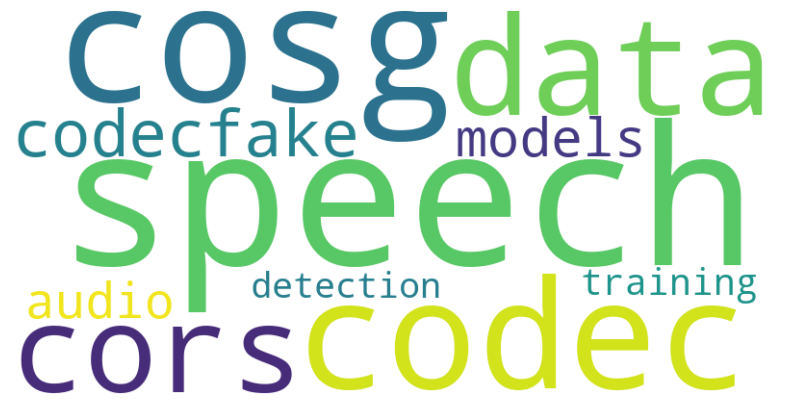

In [18]:
#%pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract keywords and their frequencies
key_terms = analyze_text(processed_text)

# Create a word cloud based on keyword frequency
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(dict(key_terms))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
import csv

# Save keywords and their frequencies to a CSV file
def save_keywords_to_csv(keywords, filename="keywords.csv"):
    with open(filename, mode="w", newline="") as file:
        writer = csv.writer(file)
        writer.writerow(["Keyword", "Frequency"])
        for keyword, freq in keywords:
            writer.writerow([keyword, freq])

# Save keywords to a file
save_keywords_to_csv(key_terms)


: 